In [20]:
import gzip
import json
import pandas as pd
import seaborn as sns

doc_id_to_doc_id_to_similarity = {}

with gzip.open('../data/document-similarities.jsonl.gz') as f:
    for l in f:
        l = json.loads(l.decode('utf8'))

        for s in l['scores']:
            first_doc_id, last_doc_id = sorted([s['doc-a'], s['doc-b']])
            if first_doc_id not in doc_id_to_doc_id_to_similarity:
                doc_id_to_doc_id_to_similarity[first_doc_id] = {}
            
            doc_id_to_doc_id_to_similarity[first_doc_id][last_doc_id] = float(s['s3-score'])

df_s3_scores = []

for first_doc_id in doc_id_to_doc_id_to_similarity.keys():
    for second_doc_id, s3_score in doc_id_to_doc_id_to_similarity[first_doc_id].items():
        df_s3_scores += [{'first': first_doc_id, 'second': second_doc_id, 's3-score': s3_score}]

df_s3_scores = pd.DataFrame(df_s3_scores)

In [21]:
df_s3_scores[['s3-score']].describe()

,s3-score
count,175517.000000
mean,0.716625
std,0.363263
min,0.000000
25%,0.553779
50%,0.887685
75%,1.000000
max,1.000000


<Axes: xlabel='s3-score', ylabel='Proportion'>

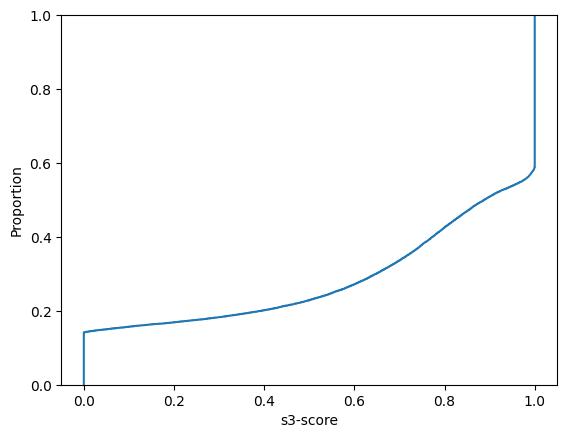

In [31]:
plt = sns.ecdfplot(data=df_s3_scores, x='s3-score')
plt.get_figure().savefig("../figures/document-similarities.pdf") 
plt